In [16]:
import math
from dataclasses import dataclass
from typing import Dict, List, Tuple, Optional
import pandas as pd
import matplotlib.pyplot as plt
import collections, heapq, itertools, math, textwrap
import networkx as nx

In [3]:
# Arithmetic Coding algorithms

# Arithmetic Coding algorithms

## Scaling and incremental coding

# Variable Length Encoding

# Shannon-Fano algorithm

In [4]:
class ShannonFano:
  """Shannon-Fano coding algorithm"""

  def __init__(self, text: str) -> None:
    # Үсэгнүүдийн давтамж, магадлал, битийн хүснэгт хадгалах
    self.freqs = {}
    self.probs = {}
    self.codedict = {}

    if text:
      self.fit(text)

  def fit(self, text: str) -> None:
    # Өгөгдсөн текст дээр алгоритмыг ачааллуулах
    self._compute_frequencies(text)
    self._compute_probabilities()
    self._build_codedict()

  def encode(self, text: str) -> str:
    # Өгөгдсөн текстийг битийн мөр болгон хувиргах
    return "".join(self.codedict[char] for char in text)
  
  def decode(self, bits: str) -> str:
    # Битийн мөрийг анхны текст рүү хөрвүүлэх
    rev = {code: sym for sym, code in self.codedict.items()}
    buffer, output = "", []

    # Битийн мөрийг битийн хүснэгттэй харьцуулах
    for b in bits:
      buffer += b
      if buffer in rev:
        output.append(rev[buffer])
        buffer = ""
    return "".join(output)

  @property
  def entropy(self) -> float:
    # Мэдээллийн энтропи буюуу доод хязгаар
    return -sum(p * math.log2(p) for p in self.probs.values())

  @property
  def avg_length(self) -> float:
    # Дундаж битийн урт
    return sum(self.probs[s] * len(c) for s, c in self.codedict.items())

  def dataframe(self) -> pd.DataFrame:
    # Давтамж, магадлал, битийн хүснэгтийг dataFrame-д хадгалах
    records = []
    for sym, p in sorted(self.probs.items(), key=lambda x: -x[1]):
        records.append({
            "Symbol": repr(sym),
            "Count": self.freqs[sym],
            "Probability": round(p, 4),
            "Code": self.codedict[sym],
            "Code Length": len(self.codedict[sym]),
        })
    return pd.DataFrame(records)
  
  # def summary(self) -> None:
  #       """Хураангуй хүснэгт хэвлэх."""
  #       df = self.dataframe()
  #       print(df.to_string(index=False))
  #       print("\nМэдээллийн =", f"{self.entropy:.3f}", "bits/symbol")
  #       print("Дундаж битийн урт =", f"{self.avg_length:.3f}", "bits/symbol")

  def summary(self) -> None:
    # Кодын үр дүнг хэвлэх
    print("Үсэг | Давтамж | Магадлал | Битлэх")

    for sym, p in sorted(self.probs.items(), key=lambda x: -x[1]):
      print(f"{repr(sym):6}   |   {self.freqs[sym]:5}  |\
            {p:5.3f}   |   {self.codedict[sym]}")

    print(f"\nМэдээллийн энтропи = {self.entropy:.3f} bits/symbol")
    print(f"Дундаж битийн урт   = {self.avg_length:.3f} bits/symbol")

  def _compute_frequencies(self, text: str) -> None:
    # Үсэг бүрийн давтамжийг тооцоолох
    self.freqs = dict(Counter(text))

  def _compute_probabilities(self) -> None:
    # Үсэг бүрийн магадлалыг өмнөх олсон давтамжаа ашиглан тооцоолох
    total = sum(self.freqs.values())
    self.probs = {s: c / total for s, c in self.freqs.items()}

  def _build_codedict(self) -> None:  
    # Кодын хүснэгт үүсгэх
    self.codedict = {}
    symbols_sorted = sorted(self.probs.items(),
                            key=lambda x: x[1],
                            reverse=True)
    self._shannon_fano(symbols_sorted, "")

  def _shannon_fano(self,
                    symbols: List[Tuple[str, float]],
                    prefix: str) -> None:
    
    """
    Рекурсив ашиглан магадлалаар хоёр хувааж,
    зүүн талд 0, баруун талд 1 залгах
    """

    # Суурь нөхцөл
    if len(symbols) == 1:
      sym = symbols[0][0]
      self.codedict[sym] = prefix or "0"
      return


    total = sum(p for _, p in symbols)
    cum, idx = 0.0, 0
    for i, (_, p) in enumerate(symbols):
      cum += p
      idx = i
      if cum >= total / 2:
        break
    
    left, right = symbols[:idx + 1], symbols[idx + 1:]
    self._shannon_fano(left,  prefix + "0")
    self._shannon_fano(right, prefix + "1")

In [10]:
sample_text = "Bayarsaikhan Tuguldur"
ShannonFanoAlgo = ShannonFano(sample_text)

df = ShannonFanoAlgo.dataframe()
ShannonFanoAlgo.summary()

encoded = ShannonFanoAlgo.encode(sample_text)
print("\nEncoded bits:", encoded)

decoded = ShannonFanoAlgo.decode(encoded)
print("Decoded text :", decoded)

Үсэг | Давтамж | Магадлал | Битлэх
'a'      |       4  |            0.190   |   000
'u'      |       3  |            0.143   |   001
'r'      |       2  |            0.095   |   010
'B'      |       1  |            0.048   |   0110
'y'      |       1  |            0.048   |   0111
's'      |       1  |            0.048   |   10000
'i'      |       1  |            0.048   |   10001
'k'      |       1  |            0.048   |   1001
'h'      |       1  |            0.048   |   1010
'n'      |       1  |            0.048   |   1011
' '      |       1  |            0.048   |   11000
'T'      |       1  |            0.048   |   11001
'g'      |       1  |            0.048   |   1101
'l'      |       1  |            0.048   |   1110
'd'      |       1  |            0.048   |   1111

Мэдээллийн энтропи = 3.690 bits/symbol
Дундаж битийн урт   = 3.762 bits/symbol

Encoded bits: 0110000011100001010000000100011001101000010111100011001001110100111101111001010
Decoded text : Bayarsaikhan Tuguldur


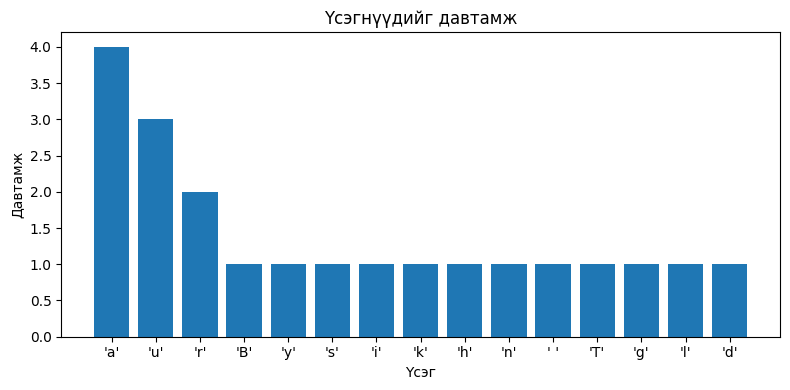

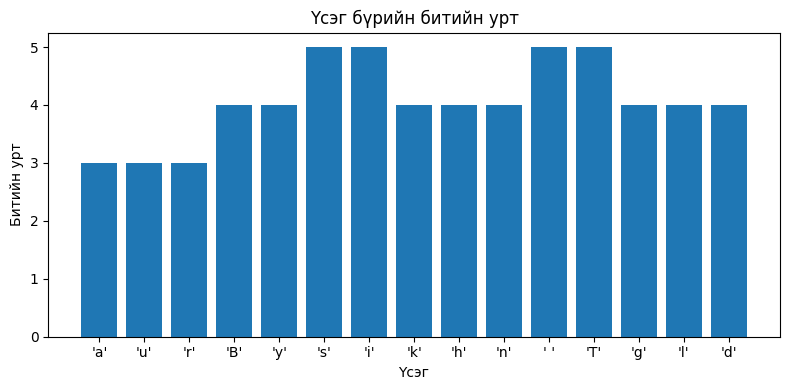

In [11]:
plt.figure(figsize=(8, 4))
plt.bar(df["Symbol"], df["Count"])
plt.title("Үсэгнүүдийг давтамж")
plt.xlabel("Үсэг")
plt.ylabel("Давтамж")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.bar(df["Symbol"], df["Code Length"])
plt.title("Үсэг бүрийн битийн урт")
plt.xlabel("Үсэг")
plt.ylabel("Битийн урт")
plt.tight_layout()
plt.show()

In [7]:
def print_ascii_tree(codebook):
    prefixes = {""}
    for code in codebook.values():
        for i in range(1, len(code)):
            prefixes.add(code[:i])

    # Тухайн зангилааны хүүхдүүд (0, 1)
    children = {p: [] for p in prefixes}
    for p in prefixes:
        for bit in ("0", "1"):
            child = p + bit
            if any(c.startswith(child) for c in codebook.values()):
                children[p].append(child)

    lines = []
    def recurse(prefix, indent, is_last):
        label = "(root)" if prefix == "" else ""
        if prefix in codebook:
            sym = codebook[prefix]
            label = f"{sym} ({prefix})"
        joint = "└─" if is_last else "├─"
        if prefix != "":
            edge_bit = prefix[-1]
            lines.append(f"{indent}{joint}{edge_bit}─ {label}")
            indent += "   " if is_last else "│  "
        else:
            lines.append(label)

        kids = children.get(prefix, [])
        for idx, kid in enumerate(kids):
            recurse(kid, indent, idx == len(kids) - 1)

    recurse("", "", True)
    print("\n".join(lines))


In [8]:
sample_text = "Bayarsaikhan Tuguldur"
coder = ShannonFano(sample_text)

print_ascii_tree({v: k for k, v in coder.codedict.items()})

(root)


## Huffman Coding

In [14]:
class Node:
    """Модыг илэрхийлэх Node"""
    _ids = itertools.count() 

    def __init__(self, freq, char=None, left=None, right=None):
        # Давтамж, тэмдэгт, зүүн, баруун Node
        self.freq, self.char = freq, char
        self.left, self.right = left, right
        self.id = next(Node._ids)

    def __lt__(self, other):
        # Node бүтцийг харьцуулах
        return (self.freq, self.id) < (other.freq, other.id)

def build_huffman_tree(text: str) -> Node:
    # Huffman модыг тооцоолох
    freqs = collections.Counter(text)                    
    heap = [Node(freq, char=ch) for ch, freq in freqs.items()]
    heapq.heapify(heap)                     

    # Суурь нөхцөл
    if len(heap) == 1:
        only = heapq.heappop(heap)
        heapq.heappush(heap, Node(only.freq, left=only, right=Node(0)))

    while len(heap) > 1:
        n1, n2 = heapq.heappop(heap), heapq.heappop(heap)
        heapq.heappush(heap, Node(n1.freq + n2.freq, left=n1, right=n2))

    return heap[0]                                     

def gen_codes(node: Node, prefix: str = "", codes=None) -> dict:
    """Модноос битийн хүснэгт гаргах"""
    if codes is None:
        codes = {}

    if node.char is not None:                           
        codes[node.char] = prefix or "0"               
    else:
        gen_codes(node.left,  prefix + "0", codes)
        gen_codes(node.right, prefix + "1", codes)

    return codes

def huffman_encode(text: str):
    """Мод, битийн хүснэгт, шифрлэгдсэн текстийг буцаах"""
    root = build_huffman_tree(text)
    codes = gen_codes(root)
    encoded = "".join(codes[ch] for ch in text)          
    return root, codes, encoded

In [15]:
text = "Tuguldur Bayarsaikhan"                         
root, codes, encoded = huffman_encode(text)

freqs = collections.Counter(text)
total = len(text)

rows = [(ch, freq,
         f"{freq/total:.3f}",
         codes[ch])
        for ch, freq in freqs.items()]
rows.sort(key=lambda x: (-x[1], x[0]))                  

col_widths = [5, 8, 11, 10]
header = ["Үсэг", "Давтамж", "Магадлал", "Битлэх"]

def fmt_row(cols):
    return " | ".join(str(c).ljust(w) for c, w in zip(cols, col_widths))

print(fmt_row(header))
print("-" * (sum(col_widths) + 9))
for ch, freq, prob, code in rows:
    visible = repr(ch)[1:-1] if ch == " " else ch  
    print(fmt_row([visible, freq, prob, code]))

entropy = -sum((f/total)*math.log2(f/total) for f in freqs.values())
avg_len = sum((f/total)*len(codes[ch]) for ch, f in freqs.items())

print("\nМэдээллийн энтропи =", f"{entropy:.3f}", "bits/symbol")
print("Дундаж битийн урт   =", f"{avg_len:.3f}", "bits/symbol\n")

print("Encoded bits:", encoded)

decoded, node = [], root
for bit in encoded:
    node = node.left if bit == "0" else node.right
    if node.char is not None:
        decoded.append(node.char)
        node = root
print("Decoded text :", "".join(decoded))

Үсэг  | Давтамж  | Магадлал    | Битлэх    
-------------------------------------------
a     | 4        | 0.190       | 110       
u     | 3        | 0.143       | 101       
r     | 2        | 0.095       | 1110      
      | 1        | 0.048       | 0010      
B     | 1        | 0.048       | 0011      
T     | 1        | 0.048       | 11110     
d     | 1        | 0.048       | 0001      
g     | 1        | 0.048       | 11111     
h     | 1        | 0.048       | 1000      
i     | 1        | 0.048       | 0110      
k     | 1        | 0.048       | 0111      
l     | 1        | 0.048       | 0000      
n     | 1        | 0.048       | 1001      
s     | 1        | 0.048       | 0101      
y     | 1        | 0.048       | 0100      

Мэдээллийн энтропи = 3.690 bits/symbol
Дундаж битийн урт   = 3.762 bits/symbol

Encoded bits: 1111010111111101000000011011110001000111100100110111001011100110011110001101001
Decoded text : Tuguldur Bayarsaikhan


In [32]:
def draw_huffman_nx(root: Node):
    
    G = nx.DiGraph()

    # Рекурсив ашиглан Node бүрийг Графт нэмэв
    def walk(node: Node):
        nid = str(id(node))
        G.add_node(nid, label=node.char)
        if node.left:
            lid = walk(node.left)
            G.add_edge(nid, lid, bit="0")                # ⓒ Монгол: зүүн ирмэг '0'
        if node.right:
            rid = walk(node.right)
            G.add_edge(nid, rid, bit="1")                # ⓓ Монгол: баруун ирмэг '1'
        return nid

    walk(root)

    # ⓔ Монгол: мод хэлбэрийн байрлал (spring_layout-аас илүү tidy)
    pos = hierarchy_pos(G, str(id(root)))

    node_labels = {n: (G.nodes[n]["label"] or "") for n in G.nodes}
    edge_labels = nx.get_edge_attributes(G, "bit")

    nx.draw(G, pos, with_labels=True, labels=node_labels,
            node_color="lightgreen", node_size=800,
            font_size=14, arrows=False)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels,
                                 font_color="red")
    plt.axis("off")
    plt.show()


def hierarchy_pos(G, root, width=1., vert_gap=.2, vert_loc=0, xcenter=.5):
    """(Туслах) Binary модыг hierarchy-гаар байрлуулах"""
    def _hierarchy_pos(G, root, leftmost, width, vgap, vloc, xcent,
                       pos=None, parent=None):
        if pos is None:
            pos = {root: (xcent, vloc)}
        else:
            pos[root] = (xcent, vloc)

        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)

        if children:
            dx = width / len(children)
            nextx = xcent - width / 2 - dx / 2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G, child, leftmost, dx, vgap,
                                     vloc - vgap, nextx, pos, root)
        return pos

    return _hierarchy_pos(G, root, 0, width, vert_gap, vert_loc, xcenter)

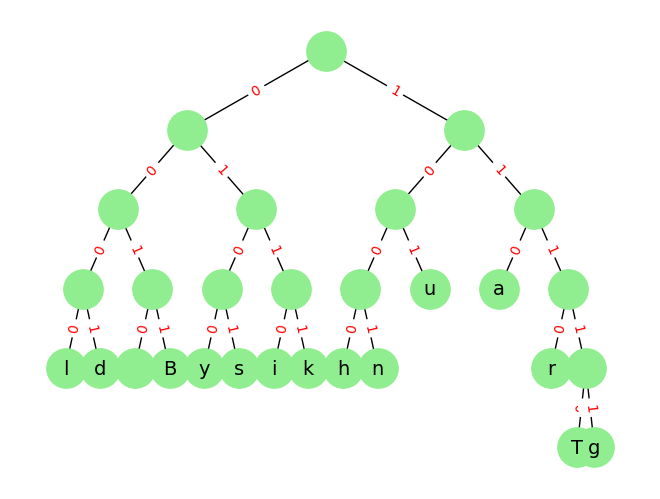

In [33]:
root = build_huffman_tree("Tuguldur Bayarsaikhan")

draw_huffman_nx(root)             # NetworkX example
